https://discourse.julialang.org/t/solving-a-petersen-matrix-with-julia/67674

In [1]:
using DifferentialEquations
using Parameters
using StaticArrays
using Plots

In [2]:
function f(u, p, t)
    @unpack M, k1, kf, kr, kcat = p
    A, B, S, E, ES, P = u
    v = SVector(k1*A*B^2, kf*E*S, kr*ES, kcat*ES)
    M*v
end

f (generic function with 1 method)

In [3]:
M = [
    -1  0  0  0
    -2  0  0  0
    +1 -1 +1  0
     0 -1 +1 +1
     0 +1 -1 -1
     0  0  0 +1
]

p = (
    M = SMatrix{6, 4, Float64}(M),
    k1 = 1.0, 
    kf = 1.0, 
    kr = 1.0, 
    kcat = 1.0, 
)

u0 = SVector(
    #= A  =# 1.5, 
    #= B  =# 1.2, 
    #= S  =# 0.0, 
    #= E  =# 1.0, 
    #= ES =# 0.0, 
    #= P  =# 0.0,
)

tspan = (0.0, 10.0)

(0.0, 10.0)

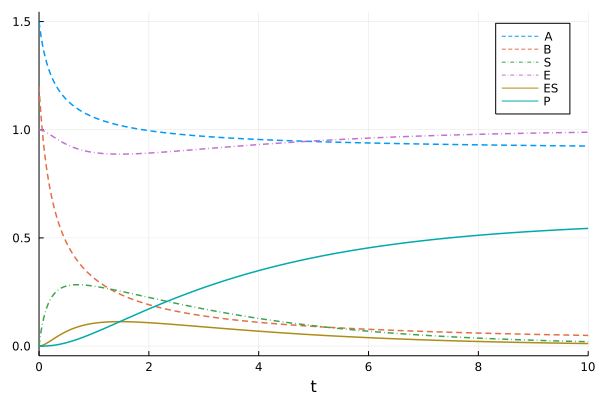

In [4]:
prob = ODEProblem(f, u0, tspan, p)
sol = solve(prob)
label = ["A" "B" "S" "E" "ES" "P"]
linestyle = [:dash :dash :dashdot :dashdot :solid :solid]
plot(sol; label, linestyle, lw=1.5)

In [5]:
function g(u, p, t)
    @unpack M, k1, kf, kr, kcat = p
    A, B, S, E, ES, P = u
    dA = -k1*A*B^2
    dB = -2k1*A*B^2
    dS = k1*A*B^2 - kf*E*S + kr*ES
    dE  = -kf*E*S + kr*ES + kcat*ES
    dES =  kf*E*S - kr*ES - kcat*ES
    dP = kcat*ES
    SVector(dA, dB, dS, dE, dES, dP)
end

g (generic function with 1 method)

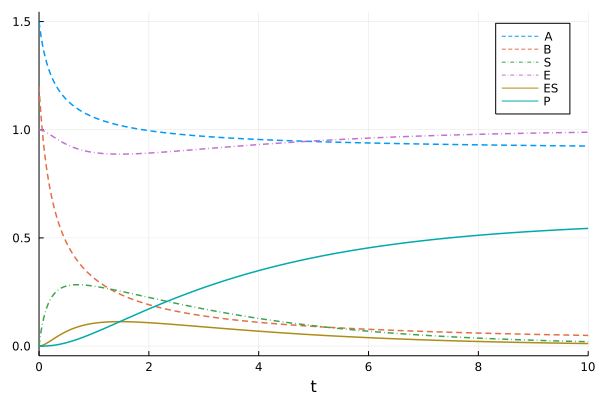

In [6]:
prob = ODEProblem(g, u0, tspan, p)
sol = solve(prob)
label = ["A" "B" "S" "E" "ES" "P"]
linestyle = [:dash :dash :dashdot :dashdot :solid :solid]
plot(sol; label, linestyle, lw=1.5)